# Setup 

In [118]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [130]:
X = np.random.rand(100,1)
y = 10 + 3 *   X + np.random.rand(100,1)

Text(0.5, 1.0, 'Data points to be used in this notebook')

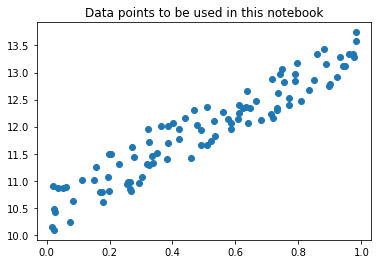

In [131]:
plt.scatter(X,y)
plt.title("Data points to be used in this notebook")

# Linear regression "variants"

In linear regression we are trying to fit the best line to the data. Polynomial regression will not be covered here. 

### 1. Normal Equation 

$$
\theta^{min} = (X^TX)^{-1}X^Ty \\
$$

In [132]:
X_b = np.c_[np.ones((len(X),1)), X] #need this so we can get "b" back - adds column of 1s to the left
theta_min = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [133]:
theta_min

array([[10.46810216],
       [ 2.93321087]])

In [134]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_pred = X_new_b.dot(theta_min)

In [135]:
y_pred

array([[10.46810216],
       [16.33452391]])

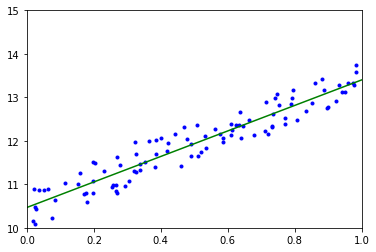

In [137]:
plt.plot(X,y,"b.")
plt.plot(X_new, y_pred, "g-")
plt.axis([0, 1, 10, 15])
plt.show()

### 2.  Batch Gradient Descent 

The mean squared error is a convex function so using batch gradient descent will guarantee reaching the global minimum.

Mean squared error

$$
MSE = \frac{1}{2m}\sum_{i = 1}^{i = m}(y_{i}-y_{i}^{pred})^2 \\
$$

Cost function

$$
\nabla_{\theta}MSE(\theta) = \frac{\partial}{\partial \theta_{0}}MSE(\theta)...\frac{\partial}{\partial \theta_{m}}MSE(\theta) = \frac{2}{m}X^{T}(X\theta-y)\\
$$

Step function

$$
\theta^{next} = \theta - \alpha\nabla_{\theta}MSE(\theta)
$$

In [194]:
alpha = 0.5
theta = [[0],
        [0]] #can be done, unlike in nerual networks
iteration_count = 200
X_b = np.c_[np.ones((len(X),1)), X]

for i in range(iteration_count):
    gradients = 2/len(X) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - alpha * gradients

In [195]:
theta

array([[10.46809995],
       [ 2.933215  ]])

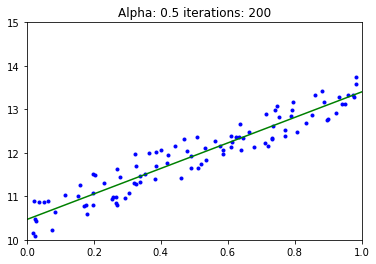

In [200]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_pred = X_new_b.dot(theta)

plt.plot(X,y,"b.")
plt.plot(X_new, y_pred, "g-")
plt.axis([0, 1, 10, 15])
plt.title(f"Alpha: {alpha} iterations: {iteration_count}")
plt.show()